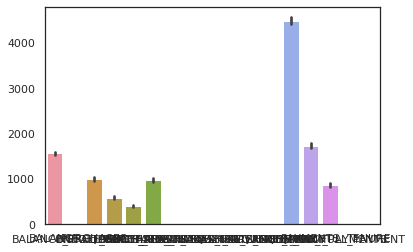

In [25]:
import pandas as pd
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

#Reading the Data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CC.csv')
sns.barplot(data=data)


In [30]:
#Removing the unrequired columns
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
#Filling all the null values with mean
x=x.apply(lambda x: x.fillna(x.mean()),axis=0)
print(x.isnull().sum())
print(x)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
          BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0       40.900749           0.818182  ...          0.000000      12
1     3202.467416           0.909091  ...          0.222222      12
2     2495.148862           1.000000  ...          0.000000      12
3     1666.670542           0.636364  ...          0.000000      12
4

In [29]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
scaler.fit(x)
# Apply transform to both the training set and the test set.
x= scaler.transform(x)
X_scaled_array=scaler.transform(x)
X_scaled=pd.DataFrame(X_scaled_array)
x=X_scaled
print(x)

               0         1             2   ...           14            15    16
0       40.900749  0.818182  9.540000e+01  ...   139.509787 -1.948327e-16  12.0
1     3202.467416  0.909091  1.863213e-10  ...  1072.340217  2.222220e-01  12.0
2     2495.148862  1.000000  7.731700e+02  ...   627.284787 -1.948327e-16  12.0
3     1666.670542  0.636364  1.499000e+03  ...   864.206542 -1.948327e-16  12.0
4      817.714335  1.000000  1.600000e+01  ...   244.791237 -1.948327e-16  12.0
...           ...       ...           ...  ...          ...           ...   ...
8945    28.493517  1.000000  2.911200e+02  ...    48.886365  5.000000e-01   6.0
8946    19.183215  1.000000  3.000000e+02  ...   864.206542 -1.948327e-16   6.0
8947    23.398673  0.833333  1.444000e+02  ...    82.418369  2.500000e-01   6.0
8948    13.457564  0.833333  1.863213e-10  ...    55.755628  2.500000e-01   6.0
8949   372.708075  0.666667  1.093250e+03  ...    88.288956 -1.948327e-16   6.0

[8950 rows x 17 columns]


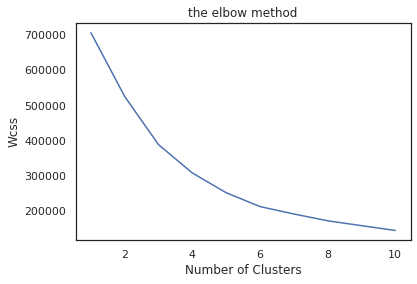

In [9]:
#Plotting the Elbow Graph for best K value
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [0]:
#WE GOT K=3
#Building the model
from sklearn.cluster import KMeans
nclusters = 3              # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)

In [11]:
#Silhouette Score
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)


0.3184572760733536


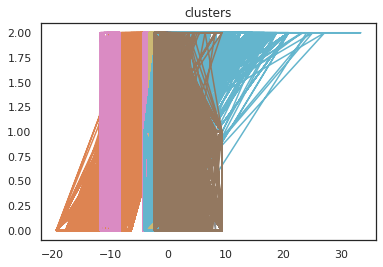

In [12]:
plt.plot(x, y_cluster_kmeans)
plt.title('clusters')
plt.show()